In [2]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
def get_norm(bf):
    """
    Calculate the norm of the bulk flow when it is of the shape
    `(nsimulations, nmeasurements_per_simulation, ndist, 3)` by stacking
    along the first and second axis.
    """
    ndist = bf.shape[2]

    bx = np.asarray([bf[..., i, 0].reshape(-1, ) for i in range(ndist)]).T
    by = np.asarray([bf[..., i, 1].reshape(-1, ) for i in range(ndist)]).T
    bz = np.asarray([bf[..., i, 2].reshape(-1, ) for i in range(ndist)]).T

    return np.sqrt(bx**2 + by**2 + bz**2)

In [155]:
data = np.load("/mnt/extraspace/rstiskalek/csiborg_postprocessing/field_shells/bf_estimators_quijote.npz")

bf_volume, bf_peery, bf_const, distances = (
    data[key] for key in ["bf_volume", "bf_peery", "bf_const", "distances"])

# bf_volume = bf_volume[:, 0, :, :]
# bf_peery = bf_peery[:, 0, :, :]
# bf_const = bf_const[:, 0, :, :]


# bf_volume = np.linalg.norm(bf_volume, axis=-1)
# bf_peery = np.linalg.norm(bf_peery, axis=-1)
# bf_const = np.linalg.norm(bf_const, axis=-1)

dbf_peeryvol = get_norm(bf_peery - bf_volume)
dbf_constvol = get_norm(bf_const - bf_volume)


bf_volume = get_norm(bf_volume)
bf_peery = get_norm(bf_peery)
bf_const = get_norm(bf_const)
# bf_volume_norm = np.linalg.norm(bf_volume, axis=-1)
# bf_peery_norm = np.linalg.norm(bf_peery, axis=-1)
# bf_const_norm = np.linalg.norm(bf_const, axis=-1)

In [156]:
# bf_volume = np.linalg.norm(bf_volume, axis=-1)
# bf_peery = np.linalg.norm(bf_peery, axis=-1)
# bf_const = np.linalg.norm(bf_const, axis=-1)

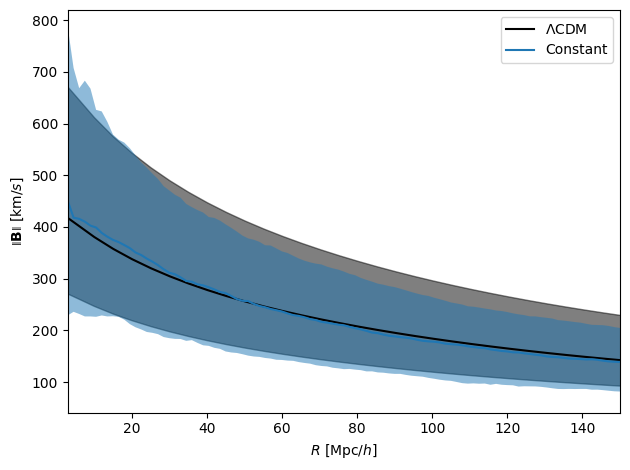

In [162]:
plt.figure()

# LCDM expectation
Rs,mean,std,mode,p05,p16,p84,p95 = np.load("/mnt/users/rstiskalek/csiborgtools/data/BulkFlowPlot.npy")
m = Rs < 200
plt.plot(Rs[m], mode[m], color="black", label=r"$\Lambda\mathrm{CDM}$")
plt.fill_between(Rs[m], p16[m], p84[m], alpha=0.5, color="black")

# Volume averaging
# ylow, ymed, yhigh = np.percentile(bf_volume, [16, 50, 84], axis=0)
# plt.plot(distances, ymed, label="Volume average")
# plt.fill_between(distances, ylow, yhigh, alpha=0.5)

# Peery 1 / r^2
# ylow, ymed, yhigh = np.percentile(bf_peery, [16, 50, 84], axis=0)
# plt.plot(distances, ymed)
# plt.fill_between(distances, ylow, yhigh, alpha=0.5, label="Peery")

# Constant weights
ylow, ymed, yhigh = np.percentile(bf_const, [16, 50, 84], axis=0)
plt.plot(distances, ymed, label="Constant")
plt.fill_between(distances, ylow, yhigh, alpha=0.5)


plt.legend()
plt.xlim(distances[1], distances.max())
# plt.ylim(100, 750)

plt.xlabel(r"$R ~ [\mathrm{Mpc} / h]$")
plt.ylabel(r"$\left\| \mathbf{B} \right\| ~ [\mathrm{km} / s]$")
plt.tight_layout()
plt.savefig("../../plots/bf_estimators_quijote.png", dpi=450)
plt.show()

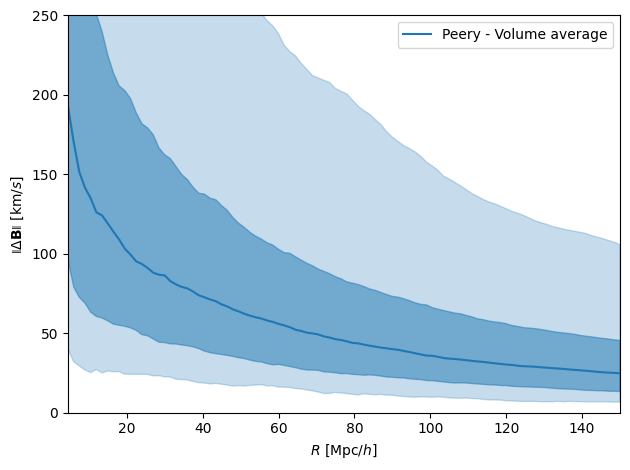

In [154]:
plt.figure()
cols = plt.rcParams['axes.prop_cycle'].by_key()['color']

# LCDM expectation
# Rs,mean,std,mode,p05,p16,p84,p95 = np.load("/mnt/users/rstiskalek/csiborgtools/data/BulkFlowPlot.npy")
# m = Rs < 200
# plt.plot(Rs[m], mode[m], color="black", label=r"$\Lambda\mathrm{CDM}$")
# plt.fill_between(Rs[m], p16[m], p84[m], alpha=0.5, color="black")

# Volume averaging
ylow, ymed, yhigh = np.percentile(dbf_peeryvol, [16, 50, 84], axis=0)
ylowlow, ylow, ymed, yhigh, yhighhigh = np.percentile(dbf_peeryvol, [2.5, 16, 50, 84, 97.5], axis=0)
plt.plot(distances, ymed, label="Peery - Volume average", c=cols[0])
plt.fill_between(distances, ylowlow, yhighhigh, alpha=0.25, color=cols[0])
plt.fill_between(distances, ylow, yhigh, alpha=0.5, color=cols[0])

# ylowlow, ylow, ymed, yhigh, yhighhigh = np.percentile(dbf_constvol, [2.5, 16, 50, 84, 97.5], axis=0)
# plt.plot(distances, ymed, label="Const - Volume average", c=cols[1])
# plt.fill_between(distances, ylowlow, yhighhigh, alpha=0.25, color=cols[1])
# plt.fill_between(distances, ylow, yhigh, alpha=0.5, color=cols[1])

# # # Peery 1 / r^2
# ylow, ymed, yhigh = np.percentile(bf_peery, [16, 50, 84], axis=0)
# plt.plot(distances, ymed)
# plt.fill_between(distances, ylow, yhigh, alpha=0.5, label="Peery")

# # # Constant weights
# ylow, ymed, yhigh = np.percentile(bf_const, [16, 50, 84], axis=0)
# plt.plot(distances, ymed, label="Constant")
# plt.fill_between(distances, ylow, yhigh, alpha=0.5)

plt.xlim(distances[2], distances.max())

# plt.ylim(100, 750)

# plt.axhline(0, c="red")

plt.xlabel(r"$R ~ [\mathrm{Mpc} / h]$")
plt.ylabel(r"$\left\| \Delta \mathbf{B} \right\| ~ [\mathrm{km} / s]$")
plt.ylim(0, ymax=250)
plt.legend()
plt.tight_layout()
plt.savefig("../../plots/dbf_estimators_peery_quijote.png", dpi=450)
plt.show()

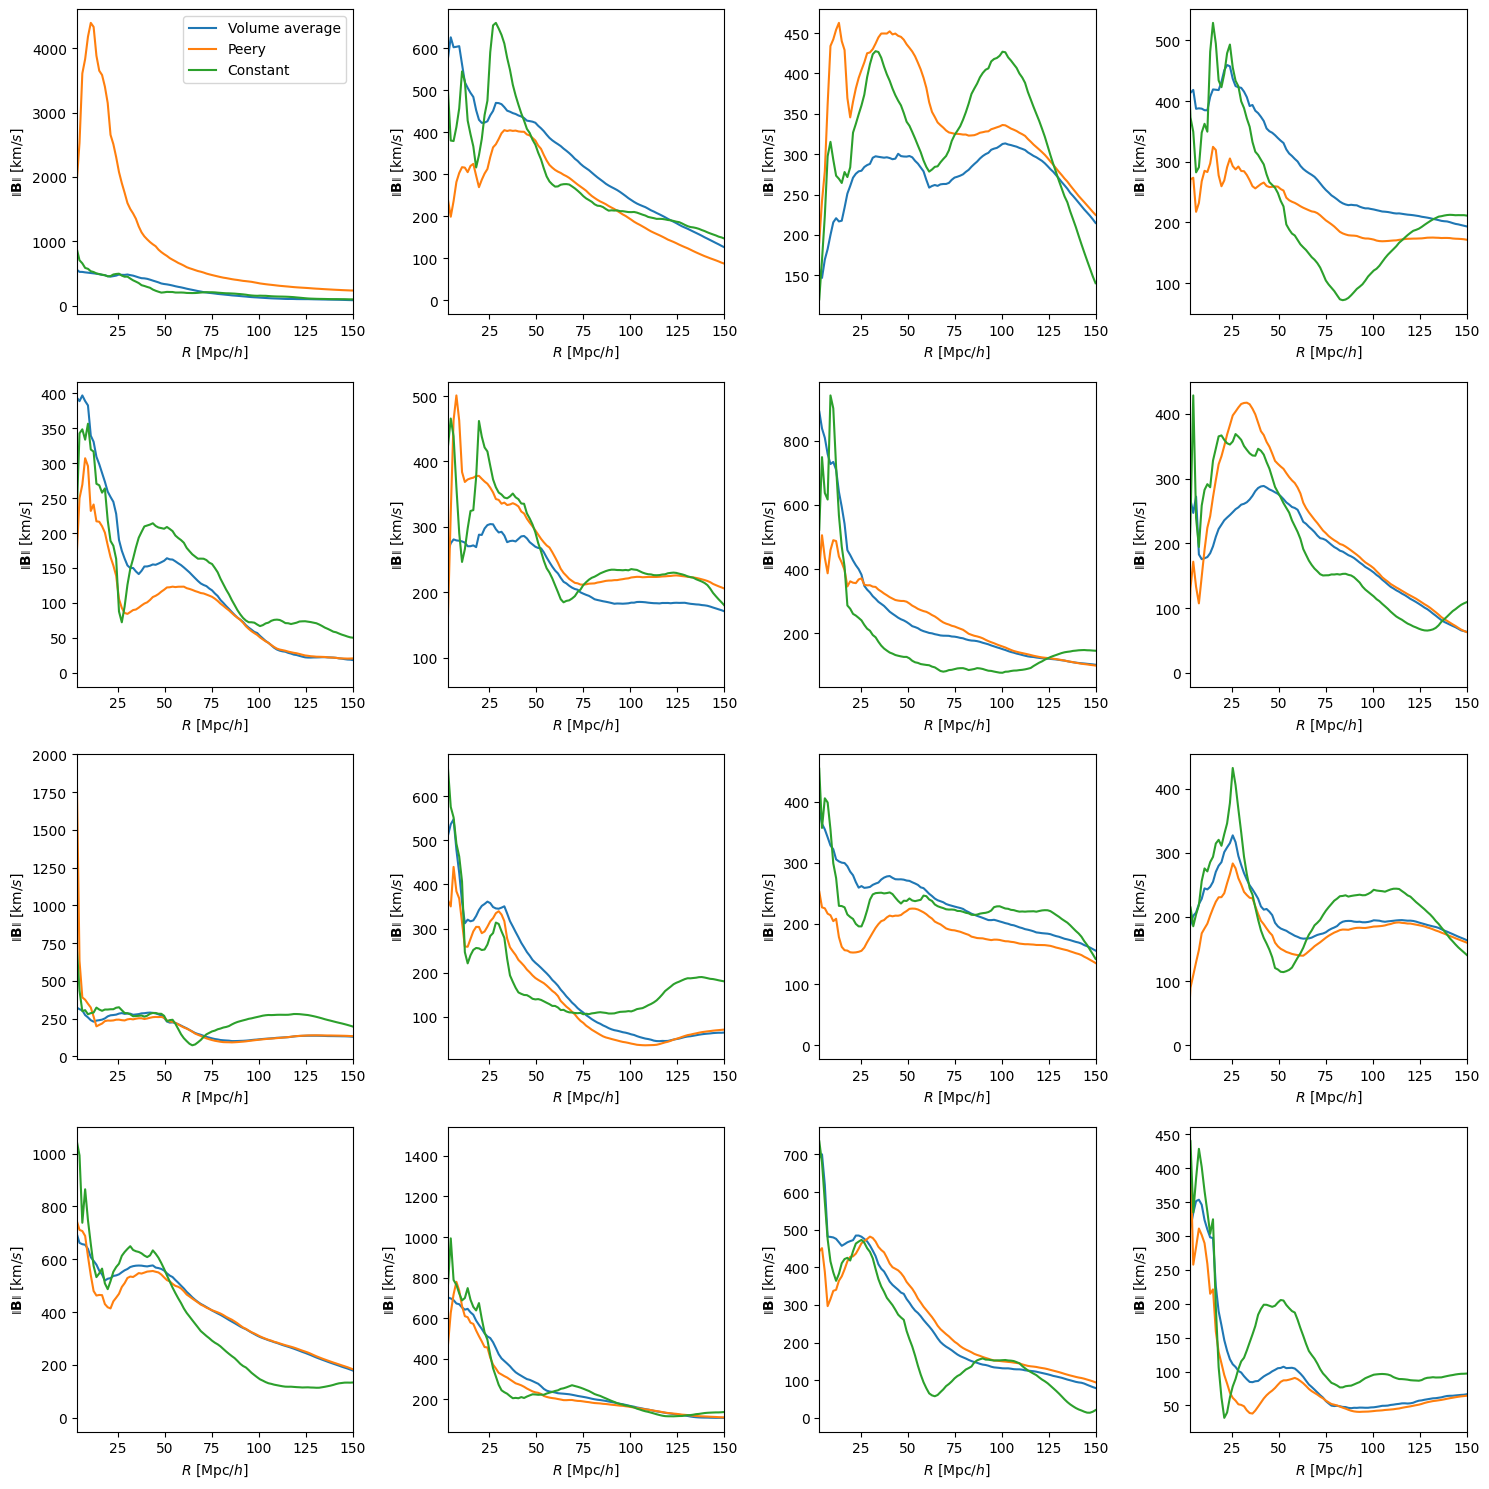

In [133]:
k = 0
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
for i in range(4):
    for j in range(4):
        axs[i, j].plot(distances, bf_volume[k, ...], label="Volume average" if k == 0 else "")
        axs[i, j].plot(distances, bf_peery[k, ...], label="Peery" if k == 0 else "")
        axs[i, j].plot(distances, bf_const[k, ...], label="Constant" if k == 0 else "")

        axs[i, j].set_xlim(distances[1], distances.max())
        axs[i, j].set_xlabel(r"$R ~ [\mathrm{Mpc} / h]$")
        axs[i, j].set_ylabel(r"$\left\| \mathbf{B} \right\| ~ [\mathrm{km} / s]$")

        k += 1

axs[0, 0].legend()
fig.tight_layout()
fig.savefig("../../plots/bf_estimators_examples.png", dpi=450)
fig.show()